# Ejemplo de CNN 2D en la base de datos cifar100

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [14]:
# descargamos los datos cifar100 y los partimos en train y test
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [17]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


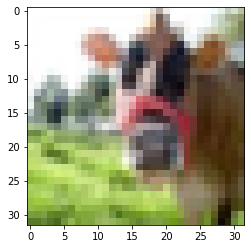

In [6]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [15]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Modelo

In [19]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(16, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [20]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Este es el modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 32)       

In [22]:
# Vamos a usar el callback de earlystopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [23]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.3, epochs=50, callbacks=[early_stopping])

Epoch 1/50
110/110 [==============================] - 12s 107ms/step - loss: 12177.9316 - accuracy: 0.0154 - val_loss: 1481.5311 - val_accuracy: 0.0093
Epoch 2/50
110/110 [==============================] - 12s 105ms/step - loss: 90.4663 - accuracy: 0.0160 - val_loss: 58.5222 - val_accuracy: 0.0113
Epoch 3/50
110/110 [==============================] - 12s 109ms/step - loss: 51.5117 - accuracy: 0.0169 - val_loss: 40.8044 - val_accuracy: 0.0093
Epoch 4/50
110/110 [==============================] - 12s 107ms/step - loss: 36.2075 - accuracy: 0.0166 - val_loss: 31.3161 - val_accuracy: 0.0093
Epoch 5/50
110/110 [==============================] - 12s 107ms/step - loss: 27.6781 - accuracy: 0.0126 - val_loss: 25.4033 - val_accuracy: 0.0113
Epoch 6/50
110/110 [==============================] - 12s 107ms/step - loss: 22.4529 - accuracy: 0.0154 - val_loss: 21.3356 - val_accuracy: 0.0080
Epoch 7/50
110/110 [==============================] - 12s 107ms/step - loss: 18.8512 - accuracy: 0.0169 - val_los

In [24]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

157/157 [==============================] - 2s 13ms/step - loss: 4.8386 - accuracy: 0.0112


[4.838570594787598, 0.01119999960064888]

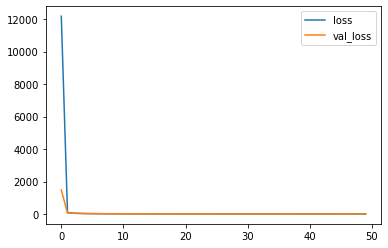

In [25]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


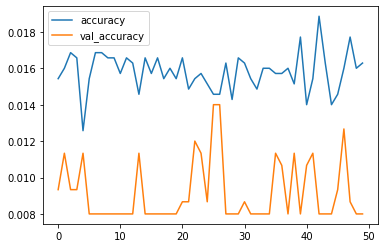

In [26]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [27]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

(5000, 100)

64


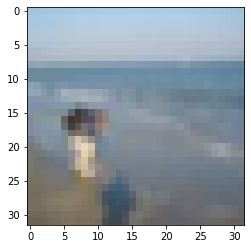

In [34]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 4000
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))